In [1]:
from findmycells.main import Project
from findmycells.preprocessing import CropStitchingArtefacts
from findmycells.segmentation import Deepflash2BinaryAndInstanceSegmentationStrategy
from findmycells.quantifications import ReconstructCellsIn3DFrom2DInstanceLabels, CountCellsInWholeStructure
from findmycells.inspection import InspectReconstructedCellsBasedOnMultiMatchIDX

import os

In [2]:
if os.path.isdir('/mnt/c/Users/dsege/TEMP/test_project2/'):
    project_root_dir = '/mnt/c/Users/dsege/TEMP/test_project2/'
else:
    project_root_dir = 'please add the filepath to your project root directory here'

In [3]:
user_input_via_gui = {'project_root_dir': project_root_dir}

In [4]:
test_project = Project(user_input_via_gui)

In [21]:
# initial check whether also the dictionary was created properly:
test_project.database.file_infos

{'file_id': ['0000', '0001', '0002', '0003'],
 'original_file_id': ['#5_SN_tg_s2_sfr1',
  '#8_SN_tg_s2_sfr1',
  '#7_SN_wt_s2_sfr1',
  '#9_SN_wt_s2_sfr1'],
 'group_id': ['tg', 'tg', 'wt', 'wt'],
 'subject_id': ['#5_tg_old', '#8_tg_old', '#7_wt_old', '#9_wt_old'],
 'microscopy_filepath': ['/mnt/c/Users/dsege/TEMP/test_project2/00_microscopy_images/tg/#5_tg_old/#5_SN_tg_s2_sfr1.czi',
  '/mnt/c/Users/dsege/TEMP/test_project2/00_microscopy_images/tg/#8_tg_old/#8_SN_tg_s2_sfr1.czi',
  '/mnt/c/Users/dsege/TEMP/test_project2/00_microscopy_images/wt/#7_wt_old/#7_SN_wt_s2_sfr1.czi',
  '/mnt/c/Users/dsege/TEMP/test_project2/00_microscopy_images/wt/#9_wt_old/#9_SN_wt_s2_sfr1.czi'],
 'microscopy_filetype': ['.czi', '.czi', '.czi', '.czi'],
 'rois_present': [True, True, True, True],
 'rois_filepath': ['/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#5_tg_old/#5_SN_tg_s2_sfr1.roi',
  '/mnt/c/Users/dsege/TEMP/test_project2/01_rois_to_analyze/tg/#8_tg_old/#8_SN_tg_s2_sfr1.roi',
  '/mnt/c/U

In [22]:
# if yes, let´s continue with loading the results:
test_project.load_status()

In [23]:
# now let´s make a copy of the dictionary we want to convert into a pandas DataFrame object
file_infos = test_project.database.file_infos.copy()

# and check whether the results were actually loaded - this should return a list like: [True, True, True, True]
file_infos['preprocessing_completed']

[True, True, True, True]

If this is also the case, it´s now your turn to figure out how to convert the dictionary into a DataFrame and from there to save it as csv file into the results directory (path is stored as attribute in the database). If you get stuck at some point, just sent me an e-mail :)

Hint: you would want to use the [pandas](https://pandas.pydata.org/) package for this. You also need to import the package like this: 

In [ ]:
#If this happens to throw an error, make sure to install pandas to your conda environment 
# using `conda install pandas` in your terminal
import pandas as pd

If you got the first part working, the second part will require you to actually integrate the code you wrote into the "database.py" module so that it becomes part of the pipeline. For this, please create a new method in the Database class that contains all the code to save the file_infos dictionary as csv file into the results directory and a piece of code that calls this method in the "save_all()" method of the Database class (I added a comment at the corresponding position in line 278). 

In order for you to test whether your integrated code works, make sure to save all changes in the 'database.py' file (via clicking "File" in the very upper left corner of your Jupyter-lab browser window - and then "Save Python File") - then restart the Kernel of this notebook (via clicking "Kernel" and "Restart Kernel..."). This is neccessary because you have to import the new version of the database.py file, and that only works after restarting the kernel and re-executing the import. Now create the test_project again, load all results using load_status() and now try running: `test_project.save_all()` Did this save the csv file in the correct directory? :D

# Stuff added by Dennis:

In [41]:
import numpy as np
from typing import Dict, Tuple
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

In [5]:
test_project.load_status()

In [ ]:
test_project.

In [72]:
colors.shape

(16, 16, 16, 3)

In [73]:
colormixer = plt.cm.rainbow(np.linspace(0, 1, 5))

In [75]:
colormixer[0]

array([0.5, 0. , 1. , 1. ])

In [77]:
get_color_code([0, 1, 2, 3])

{0: {'red': 0.5, 'green': 0.0, 'blue': 1.0},
 1: {'red': 0.16666666666666663,
  'green': 0.8660254037844386,
  'blue': 0.8660254037844387},
 2: {'red': 0.8333333333333333,
  'green': 0.8660254037844387,
  'blue': 0.5000000000000001},
 3: {'red': 1.0,
  'green': 1.2246467991473532e-16,
  'blue': 6.123233995736766e-17}}

In [79]:
def get_color_code_3D(label_ids):
    n_label_ids = len(label_ids)
    colormixer = plt.cm.rainbow(np.linspace(0, 1, n_label_ids))

    color_code = dict()
    for idx in range(n_label_ids):
        color_code[label_ids[idx]] = {'red': colormixer[idx][0],
                                      'green': colormixer[idx][1],
                                      'blue': colormixer[idx][2]}
    
    return color_code

In [112]:
def get_color_code(label_ids):
    n_label_ids = len(label_ids)
    colormixer = plt.cm.rainbow(np.linspace(0, 1, n_label_ids))

    color_code = dict()
    for idx in range(n_label_ids):
        color_code[label_ids[idx]] = colormixer[idx]
    
    return color_code

In [13]:
def get_plotting_info(zstack):
    label_ids = list(np.unique(zstack))
    if 0 in label_ids:
        label_ids.remove(0)
    color_code = get_color_code(label_ids)
    
    z_dim, x_dim, y_dim = zstack.shape
    plotting_info = dict()
    for plane_index in range(z_dim):
        plotting_info[plane_index] = dict()
        
    for label_id in label_ids:
        for plane_index in range(z_dim):
            if label_id in np.unique(zstack[plane_index]):
                roi = get_polygon_from_instance_segmentation(zstack[plane_index], label_id) 
                boundary_x_coords, boundary_y_coords = np.asarray(roi.boundary.xy[0]), np.asarray(roi.boundary.xy[1])
                plotting_info[plane_index][label_id] = {'color': color_code[label_id],
                                                        'boundary_x_coords': boundary_x_coords,
                                                        'boundary_y_coords': boundary_y_coords} 
    return plotting_info

In [39]:
def get_cropping_box_arround_centroid(roi: Polygon, half_window_size: int) -> Tuple[int, int, int, int]:
    centroid_x, centroid_y = round(roi.centroid.x), round(roi.centroid.y)
    cminx, cmaxx = centroid_x - half_window_size, centroid_x + half_window_size
    cminy, cmaxy = centroid_y - half_window_size, centroid_y + half_window_size
    return cminx, cmaxx, cminy, cmaxy

In [116]:
def plot_reconstructed_cells(preprocessed_zstack, instance_seg_zstack, final_labels_zstack, plotting_info, plane_id_of_interest, save=False, show=True):
    z_dim = final_labels_zstack.shape[0]
    fig = plt.figure(figsize=(15, 5*z_dim), facecolor='white')
    gs = fig.add_gridspec(z_dim, 3)
    
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 0])
        plt.imshow(preprocessed_zstack[plane_index])
        plt.ylabel(f'plane_{plane_index}', fontsize=14)
        if plane_index == 0:
            plt.title('input image', fontsize=14, pad=15)
            
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 1])
        plt.imshow(instance_seg_zstack[plane_index])
        if plane_index == 0:
            plt.title('instance segmentation', fontsize=14, pad=15)
            
    for plane_index in range(z_dim):
        fig.add_subplot(gs[plane_index, 2])
        plt.imshow(final_labels_zstack[plane_index], cmap = 'Greys_r')
        for label_id in plotting_info[plane_index].keys():
            plt.plot(plotting_info[plane_index][label_id]['boundary_y_coords'], 
                     plotting_info[plane_index][label_id]['boundary_x_coords'], 
                     c=plotting_info[plane_index][label_id]['color'], 
                     lw=3)
        #if plane_index == plane_id_of_interest:
            #plt.plot([185, 215], [200, 200], c='red', lw='3')
            #plt.plot([200, 200], [185, 215], c='red', lw='3')
        if plane_index == 0:
            plt.title('connected components (color-coded)', fontsize=14, pad=15)
            
    if save:
        plt.savefig('inspected_area.png', dpi=300)
    if show:
        plt.show()
    else:
        plt.close()


In [114]:
# the 'results' and the 'file_ids' dictionaries have to become attributes of the object
# also the corresponding z-stacks (both unpadded again): 
#   - the 'zstack_original_label_ids' with the original instance label ids (the one we are looking for)
#   - the 'zstack_with_final_label_ids' with the final label ids
# likewise, also the directory paths have to be accessible via the database (just as the current file_id)

def inspect_reconstructed_cells(plane_id_of_interest: int, label_id_of_interest: int, zstack_with_label_id_of_interest: np.ndarray, save=False, show=True) -> None:
    """
    plane_id_of_interest: is the plane_id in which the roi of interest can be found
    label_id_of_interest: is the rois` label_id in the original instance segmentation
    """
    roi = get_polygon_from_instance_segmentation(zstack_with_label_id_of_interest[plane_id_of_interest], label_id_of_interest)
    cminx, cmaxx, cminy, cmaxy = get_cropping_box_arround_centroid(roi, 100)
    
    cropped_new_zstack = zstack_with_label_id_of_interest.copy()
    cropped_new_zstack = cropped_new_zstack[:, cminx:cmaxx, cminy:cmaxy]
    
    plotting_info = get_plotting_info(cropped_new_zstack)
    
    cropped_preprocessed_zstack = load_zstack_as_array_from_single_planes(path = preprocessed_path, 
                                                                          file_id = file_id, 
                                                                          minx = cminx, 
                                                                          maxx = cmaxx, 
                                                                          miny = cminy, 
                                                                          maxy = cmaxy)
    
    cropped_instance_seg_zstack = load_zstack_as_array_from_single_planes(path = instance_mask_path, 
                                                                          file_id = file_id, 
                                                                          minx = cminx, 
                                                                          maxx = cmaxx, 
                                                                          miny = cminy, 
                                                                          maxy = cmaxy)
       
    plot_reconstructed_cells(preprocessed_zstack = cropped_preprocessed_zstack, 
                             instance_seg_zstack = cropped_instance_seg_zstack, 
                             final_labels_zstack = cropped_new_zstack, 
                             plotting_info = plotting_info, 
                             plane_id_of_interest = plane_id_of_interest,
                             save = save,
                             show = show)

In [33]:
from findmycells.utils import load_zstack_as_array_from_single_planes, get_polygon_from_instance_segmentation
import os

In [ ]:
red_colors = np.zeros(cubes.shape)
red_colors[np.where(cubes == 1)] = 1

blue_colors = np.zeros(cubes.shape)
blue_colors[np.where(cubes == 2)] = 1

green_colors = np.zeros(cubes.shape)

rgb_cube_colors = np.zeros(cubes.shape + (3,))
rgb_cube_colors[..., 0] = red_colors
rgb_cube_colors[..., 1] = green_colors
rgb_cube_colors[..., 2] = blue_colors

In [82]:
def get_rgb_color_code_for_3D(zstack):
    label_ids = list(np.unique(zstack))
    if 0 in label_ids:
        label_ids.remove(0)
    color_code = get_color_code_3D(label_ids)
    
    red_colors = np.zeros(zstack.shape)
    green_colors = np.zeros(zstack.shape)
    blue_colors = np.zeros(zstack.shape)
    
    for label_id in label_ids:
        red_colors[np.where(zstack == label_id)] = color_code[label_id]['red']
        green_colors[np.where(zstack == label_id)] = color_code[label_id]['green']
        blue_colors[np.where(zstack == label_id)] = color_code[label_id]['blue']
        
    rgb_color_code = np.zeros(zstack.shape + (3,))
    rgb_color_code[..., 0] = red_colors
    rgb_color_code[..., 1] = green_colors
    rgb_color_code[..., 2] = blue_colors
    
    return rgb_color_code
        
        

In [110]:
def plot_reconstructed_cells_in_3D(final_labels_zstack, color_code, save=False, show=True):
    fig = plt.figure(figsize=(15, 15), facecolor='white')
    
    fig = plt.figure(figsize=(15, 15), facecolor='white')
    #gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(projection='3d')
    
    
    ax.voxels(final_labels_zstack, facecolors=color_code)
    ax.set(xlabel='single planes of z-stack', ylabel='x-dimension', zlabel='y-dimension')
    

            
    if save:
        plt.savefig('inspected_area.png', dpi=300)
    if show:
        plt.show()
    else:
        plt.close()


In [104]:
def inspect_reconstructed_cells_in_3D(plane_id_of_interest: int, label_id_of_interest: int, zstack_with_label_id_of_interest: np.ndarray, save=False, show=True) -> None:
    """
    plane_id_of_interest: is the plane_id in which the roi of interest can be found
    label_id_of_interest: is the rois` label_id in the original instance segmentation
    """
    roi = get_polygon_from_instance_segmentation(zstack_with_label_id_of_interest[plane_id_of_interest], label_id_of_interest)
    cminx, cmaxx, cminy, cmaxy = get_cropping_box_arround_centroid(roi, 100)
    
    cropped_new_zstack = zstack_with_label_id_of_interest.copy()
    cropped_new_zstack = cropped_new_zstack[:, cminx:cmaxx, cminy:cmaxy]
    
    rgb_color_code = get_rgb_color_code_for_3D(cropped_new_zstack)
       
    plot_reconstructed_cells_in_3D(final_labels_zstack = cropped_new_zstack, 
                             color_code = rgb_color_code, 
                             save = save,
                             show = show)

In [27]:
os.listdir(test_project.database.inspection_dir)

['0000_000_final_label_ids.png',
 '0000_001_final_label_ids.png',
 '0000_002_final_label_ids.png',
 '0000_003_final_label_ids.png',
 '0000_004_final_label_ids.png',
 '0000_005_final_label_ids.png',
 '0000_006_final_label_ids.png',
 '0000_007_final_label_ids.png',
 '0001_000_final_label_ids.png',
 '0001_001_final_label_ids.png',
 '0001_002_final_label_ids.png',
 '0001_003_final_label_ids.png',
 '0001_004_final_label_ids.png',
 '0001_005_final_label_ids.png',
 '0001_006_final_label_ids.png',
 '0001_007_final_label_ids.png',
 '0002_000_final_label_ids.png',
 '0002_001_final_label_ids.png',
 '0002_002_final_label_ids.png',
 '0002_003_final_label_ids.png',
 '0002_004_final_label_ids.png',
 '0002_005_final_label_ids.png',
 '0002_006_final_label_ids.png',
 '0002_007_final_label_ids.png',
 '0003_000_final_label_ids.png',
 '0003_001_final_label_ids.png',
 '0003_002_final_label_ids.png',
 '0003_003_final_label_ids.png',
 '0003_004_final_label_ids.png',
 '0003_005_final_label_ids.png',
 '0003_006

In [46]:
zstack = load_zstack_as_array_from_single_planes(path = test_project.database.inspection_dir, file_id = '0000')

In [87]:
np.unique(zstack[5])

array([   0, 2012, 2013, 2034, 2045, 2050, 2055, 2056, 2057, 2058, 2059,
       2063, 2064, 2078, 2084, 2085, 2086, 2089, 2090, 2091, 2092, 2093,
       2095, 2096, 2097, 2100, 2101, 2103, 2105, 2106, 2109, 2110, 2111,
       2112, 2113, 2120, 2121, 2123, 2125, 2126, 2127, 2128, 2130, 2131,
       2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142,
       2143, 2144, 2145, 2146, 2147, 2148, 2150, 2151, 2154, 2155, 2156,
       2157, 2158, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168,
       2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179,
       2180, 2181, 2182, 2183, 2184], dtype=uint16)

In [48]:
preprocessed_path = test_project.database.preprocessed_images_dir
instance_mask_path = test_project.database.instance_segmentations_dir
file_id = '0000'

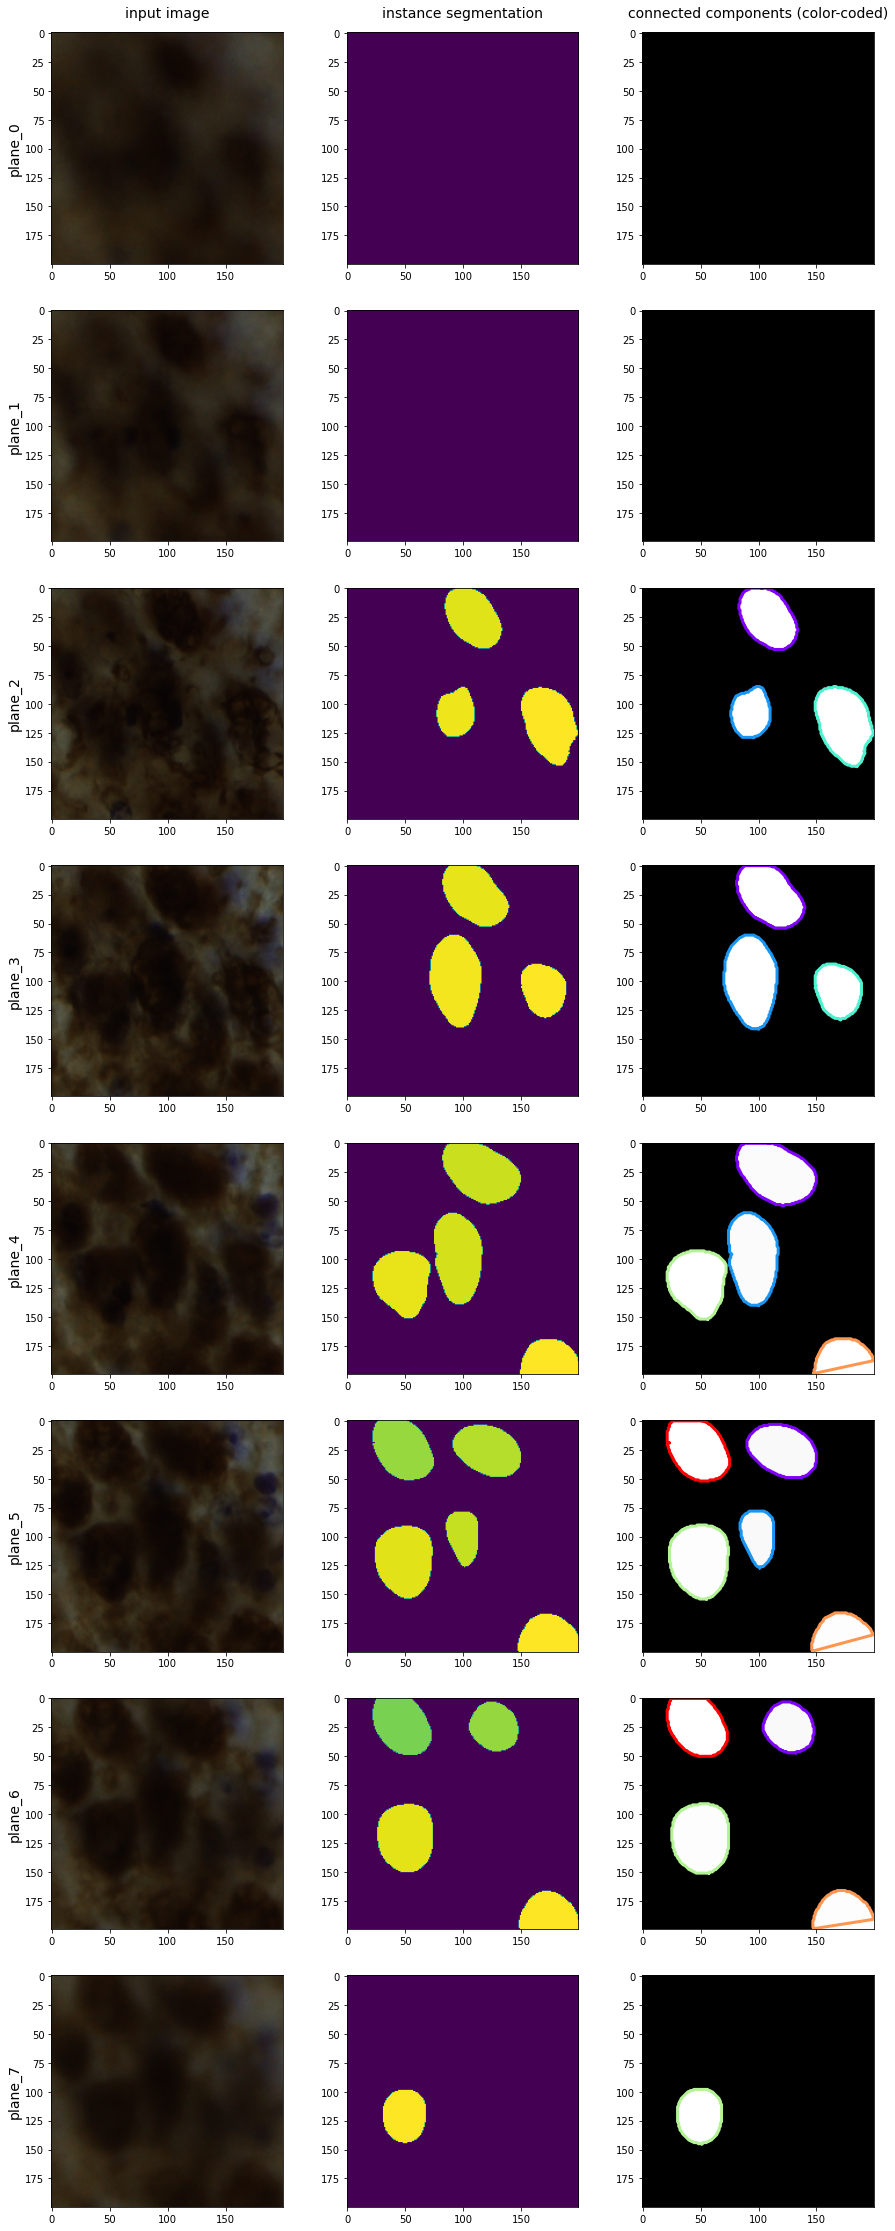

In [117]:
inspect_reconstructed_cells(plane_id_of_interest = 5, label_id_of_interest = 2064, zstack_with_label_id_of_interest = zstack, save=False, show=True)

<Figure size 1080x1080 with 0 Axes>

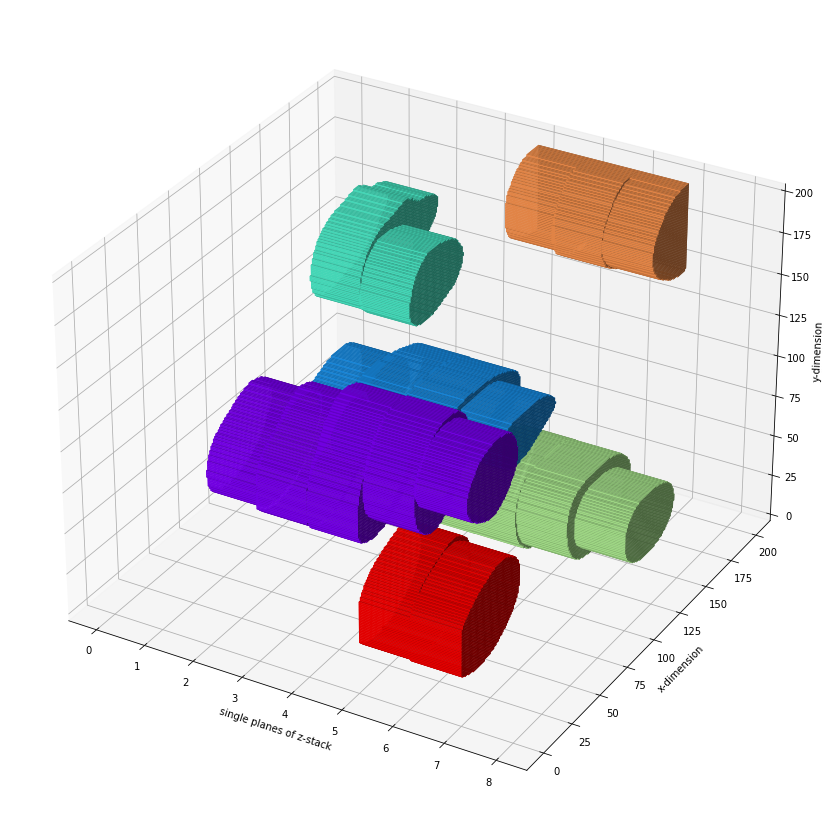

In [111]:
#2063, 2064
inspect_reconstructed_cells_in_3D(plane_id_of_interest = 5, label_id_of_interest = 2064, zstack_with_label_id_of_interest = zstack, save=False, show=True)

In [23]:
multi_matches_traceback

{'final_label_id': [2018,
  2033,
  2012,
  2013,
  2001,
  2052,
  2008,
  2069,
  2013,
  2074,
  2018,
  2008,
  2034,
  2012,
  2013,
  2074,
  2098,
  2140,
  2012,
  2148,
  2013,
  2113,
  2161,
  2143,
  2173,
  2185,
  2148,
  2191,
  2178],
 'original_instance_label_id': [7,
  29,
  36,
  44,
  4,
  6,
  30,
  53,
  65,
  66,
  14,
  40,
  58,
  62,
  72,
  73,
  39,
  66,
  71,
  81,
  85,
  91,
  26,
  53,
  69,
  27,
  42,
  43,
  46],
 'plane_index': [1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6]}

### Option A: start a new project

In [3]:
user_input_via_gui = {'project_root_dir': project_root_dir,
                      'preprocessing_configs': {0: {'method_category': None,
                                                    'method_specifier': None,
                                                    'additional_settings': dict(),
                                                    'ProcessingMethod': CropStitchingArtefacts(),
                                                    'ProcessingStrategy': None}
                                               },
                     'segmentation_strategy': Deepflash2BinaryAndInstanceSegmentationStrategy(),
                     'quantification_configs': {'segmentations_to_use': 'instance', # or 'binary'
                                                'quantification_preprocessing_strategies': [ReconstructCellsIn3DFrom2DInstanceLabels()],
                                                'quantification_strategy': CountCellsInWholeStructure(),
                                                'additional_settings': {'min_roi_size': 400,
                                                                        'min_z_extension': 2}},
                     'low_memory': True}

In [4]:
test_project = Project(user_input_via_gui)

### Option b: load status from an existing project:

In [5]:
#test_project = Project({'project_root_dir': project_root_dir})

In [5]:
test_project.load_status()

In [6]:
test_project.database.file_infos['quantification_completed']

[True, True, True, True]

In [9]:
test_project.run_quantificatons()

In [7]:
test_project.database.quantification_results

{'0000': {'000': {'inclusion_criteria_position': ['within', 'intersects'],
   'inclusion_criteria_min_z_extension': 2,
   'number_connected_components': 81}},
 '0001': {'000': {'inclusion_criteria_position': ['within', 'intersects'],
   'inclusion_criteria_min_z_extension': 2,
   'number_connected_components': 19}},
 '0002': {'000': {'inclusion_criteria_position': ['within', 'intersects'],
   'inclusion_criteria_min_z_extension': 2,
   'number_connected_components': 77}},
 '0003': {'000': {'inclusion_criteria_position': ['within', 'intersects'],
   'inclusion_criteria_min_z_extension': 2,
   'number_connected_components': 131}}}

In [14]:
test_project.database.multi_matches_traceback['0000']['original_instance_label_id'][22]

26

In [ ]:
test_project.run_inspection('0000', InspectReconstructedCellsBasedOnMultiMatchIDX(22, save=True, show=True))

In [16]:
test_project.save_status()

# This is where we want to go:

In [ ]:
## Initialize the project

project_name = Project(project_root_dir)
# project_root_dir: path of project root directory

project_name.initialize_database()
# creates the database object and sets-up everything (main subdirs, file infos, ..)
# as alternative, see: load_status()

project_name.save_current_status()
# saves current progress status to disk (basically the database.file_infos as pickle file? - what about shapely polygons that might have been loaded?)


project_name.load_status()
# Alternative to initialize_database()
# loads the corresponding information from disk and allows the user to continue from here


## Preprocessing

project_name.preprocess(microscopy_files, cropping_strategy)
# microscopy_files: list of all microscopy image files that shall be preprocessed (this would allow step-by-step processing)
# cropping_strategy: object of type CroppingStrategy that specifies which exact cropping strategy shall be used

# infers:
    # microscopy-image-file-loader from filetype (e.g. .czi file loader)
    # whether it´s a z-stack
    # whether it´s an RGB image
# automatically updates the database accordingly


## Image segmentation

project_name.run_segmentations(files, SegmentationStrategy)
# files: list of files that shall be segmented (in case of df2 make sure that all are used due to image statistics & cellpose diameter)
# SegmentationStrategy: e.g. deepflash2_binary, deepflash2_instances, intellesis

# launches the respective segmentations and saves all progress in the database object & all segmentations in the corresponding subdir


## Quantifications

project_name.run_quantifications(files, QuantificationStrategy)
# files: list of files whose segmentations shall be used for quantification
# QuantificationStrategy: e.g. 2D, 3D_grid_estimation, 3D_entire_volume (enable selection of more specific options / exclusion criteria)

# Launches the respective quantifications and saves all progress in the database object & all quantification results in the results table